# Práctica Deep Learning - Armando Bueno

In [32]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
%matplotlib inline

cm = plt.cm.RdBu
cm_bright = ListedColormap(['#FF0000', '#0000FF'])

import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.max_rows', None) # para mostrar todas las filas
pd.set_option('display.max_columns', None) # para mostrar todas las columnas

In [1]:
# Nos descargamos el dataset de OpenDataSoft
!wget -O "airbnb-listings-extract.csv" "https://public.opendatasoft.com/explore/dataset/airbnb-listings/download/?format=csv&disjunctive.host_verifications=true&disjunctive.amenities=true&disjunctive.features=true&refine.country=Spain&q=Madrid&timezone=Europe/London&use_labels_for_header=true&csv_separator=%3B"


--2023-02-03 20:12:58--  https://public.opendatasoft.com/explore/dataset/airbnb-listings/download/?format=csv&disjunctive.host_verifications=true&disjunctive.amenities=true&disjunctive.features=true&refine.country=Spain&q=Madrid&timezone=Europe/London&use_labels_for_header=true&csv_separator=%3B
Resolving public.opendatasoft.com (public.opendatasoft.com)... 34.248.20.69, 34.249.199.226
Connecting to public.opendatasoft.com (public.opendatasoft.com)|34.248.20.69|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [application/csv]
Saving to: 'airbnb-listings.csv'

airbnb-listings.csv     [        <=>         ]  54.31M  2.75MB/s    in 21s     

2023-02-03 20:13:21 (2.57 MB/s) - 'airbnb-listings.csv' saved [56950929]



In [14]:
# Leemos el dataset con pandas y mostramos los 5 primeros registros
import pandas as pd
full_df = pd.read_csv('./airbnb-listings-extract.csv', sep=';', decimal='.')
full_df.head(5)

,ID,Listing Url,Scrape ID,Last Scraped,Name,Summary,Space,Description,Experiences Offered,Neighborhood Overview,...,Review Scores Communication,Review Scores Location,Review Scores Value,License,Jurisdiction Names,Cancellation Policy,Calculated host listings count,Reviews per Month,Geolocation,Features
0,11210388,https://www.airbnb.com/rooms/11210388,20170306202425,2017-03-07,The Loft-Full Bath-Deck w/View,Loft in the Hill country 12-15 minutes directl...,This loft has a spectacular view of the hills ...,Loft in the Hill country 12-15 minutes directl...,none,This neighborhood is located in the hills west...,...,10.0,10.0,10.0,NaN,NaN,moderate,1.0,3.50,"30.3373609355,-97.8632766782","Host Is Superhost,Host Has Profile Pic,Host Id..."
1,17471131,https://www.airbnb.com/rooms/17471131,20170407214050,2017-04-08,"Claris I, Friendly Rentals","This apartment has: 1 double bed, 1 double sof...","This apartment has: 1 double bed, 1 double sof...","This apartment has: 1 double bed, 1 double sof...",none,Plaza Cataluña Catalonia Square is the large...,...,10.0,8.0,10.0,HUTB-006721,NaN,super_strict_30,106.0,0.86,"41.3896829422,2.17262543017","Host Has Profile Pic,Requires License,Instant ..."
2,17584891,https://www.airbnb.com/rooms/17584891,20170407214050,2017-04-08,"Style Terrace Red, Friendly Rentals","This apartment has: 1 double bed, 1 double sof...","This apartment has: 1 double bed, 1 double sof...","This apartment has: 1 double bed, 1 double sof...",none,Plaza Cataluña Catalonia Square is the large...,...,NaN,NaN,NaN,HUTB-007527,NaN,super_strict_30,106.0,NaN,"41.3930345489,2.16217327868","Host Has Profile Pic,Requires License,Instant ..."
3,5398030,https://www.airbnb.com/rooms/5398030,20170407214050,2017-04-08,Picasso Suite 1.4 Paseo de Gracia,Live like a local in Barcelona's most chic dis...,You wake up to the sun rising over Barcelona's...,Live like a local in Barcelona's most chic dis...,none,We're right in the heart of the chic L'Eixampl...,...,10.0,10.0,9.0,NaN,NaN,strict,24.0,1.09,"41.3969668101,2.1674178103","Host Has Profile Pic,Host Identity Verified,Re..."
4,18104606,https://www.airbnb.com/rooms/18104606,20170407214050,2017-04-08,Smart City Centre Apartment II,"Unique apartment in vibrant neighborhoods, car...","License: HUTB-005313 Charming apartment, locat...","Unique apartment in vibrant neighborhoods, car...",none,NaN,...,NaN,NaN,NaN,NaN,NaN,flexible,92.0,NaN,"41.3886851936,2.15514963616","Host Has Profile Pic,Host Identity Verified,Is..."


In [15]:
# vamos a ver de cuantos registros disponemos y de cuantas variables
full_df.shape

(14780, 89)

In [16]:
# ¿De qué variables disponemos?
full_df.columns

Index(['ID', 'Listing Url', 'Scrape ID', 'Last Scraped', 'Name', 'Summary',
       'Space', 'Description', 'Experiences Offered', 'Neighborhood Overview',
       'Notes', 'Transit', 'Access', 'Interaction', 'House Rules',
       'Thumbnail Url', 'Medium Url', 'Picture Url', 'XL Picture Url',
       'Host ID', 'Host URL', 'Host Name', 'Host Since', 'Host Location',
       'Host About', 'Host Response Time', 'Host Response Rate',
       'Host Acceptance Rate', 'Host Thumbnail Url', 'Host Picture Url',
       'Host Neighbourhood', 'Host Listings Count',
       'Host Total Listings Count', 'Host Verifications', 'Street',
       'Neighbourhood', 'Neighbourhood Cleansed',
       'Neighbourhood Group Cleansed', 'City', 'State', 'Zipcode', 'Market',
       'Smart Location', 'Country Code', 'Country', 'Latitude', 'Longitude',
       'Property Type', 'Room Type', 'Accommodates', 'Bathrooms', 'Bedrooms',
       'Beds', 'Bed Type', 'Amenities', 'Square Feet', 'Price', 'Weekly Price',
       'Month

Se ve que gran parte de los datos no aportan información relevante. Se van a eliminar de inmediato las columnas:

- Listing Url
- Scrape ID: no aporta información sobre la propiedad.
- Last Scraped: no aporta información sobre la propiedad.
- Medium Url
- Picture Url
- XL Picture Url
- Host ID: aporta información sobre el dueño, pero no sobre la propiedad (podría revisarse su inclusión si los resultados no son buenos).
- Host Url
- Host Name: no aporta información sobre la propiedad. Podría ser de interés estadístico otro tipo de dato categórico del dueño (rango de edad, sexo...) pero no el nombre.
- Host Picture Url
- Host Neighbourhood: no aporta información sobre la propiedad.
- Weekly Price: información redundante que puede actuar como predictor (y no debe)
- Monthly Price: información redundante que puede actuar como predictor (y no debe)
- Calendar Updated: información irrelevante; se podría inferir la frecuencia de actividad del dueño, pero YA hay un dato explícito de su tasa de respuesta.
- Calendar last Scraped: no aporta información sobre la propiedad.
- First review: no aporta información nueva; ya hay un dato de antiguedad del dueño.
- Last review: no aporta información nueva.
- Reviews per Month: no aporta información nueva
- Geolocation: es latitud + longitud
- Host Listings Count, Host Total Listings Count, Calculated host listings count: contador relacionado con el dueño; no aporta información sobre la propiedad.


In [17]:
# Hacemos un drop de todas las columnas que OBVIAMENTE no aportan información relevante
not_useful_columns = [
    'ID', 'Listing Url', 'Scrape ID', 'Last Scraped', 'Medium Url', 
    'Picture Url', 'XL Picture Url', 'Host ID', 'Host URL', 'Host Name', 
    'Host Thumbnail Url', 'Host Picture Url', 'Host Neighbourhood', 'Weekly Price', 
    'Monthly Price', 'Calendar Updated', 'Calendar last Scraped', 'First Review', 
    'Last Review', 'Reviews per Month', 'Geolocation', 'Calculated host listings count',
    'Host Listings Count', 'Host Total Listings Count'
]

simple_df = full_df.drop(not_useful_columns, axis=1, inplace=True)
print(simple_df)

# simpledf = full_df[not_useful_columns]

None


In [20]:
full_df.columns

Index(['Name', 'Summary', 'Space', 'Description', 'Experiences Offered',
       'Neighborhood Overview', 'Notes', 'Transit', 'Access', 'Interaction',
       'House Rules', 'Thumbnail Url', 'Host Since', 'Host Location',
       'Host About', 'Host Response Time', 'Host Response Rate',
       'Host Acceptance Rate', 'Host Verifications', 'Street', 'Neighbourhood',
       'Neighbourhood Cleansed', 'Neighbourhood Group Cleansed', 'City',
       'State', 'Zipcode', 'Market', 'Smart Location', 'Country Code',
       'Country', 'Latitude', 'Longitude', 'Property Type', 'Room Type',
       'Accommodates', 'Bathrooms', 'Bedrooms', 'Beds', 'Bed Type',
       'Amenities', 'Square Feet', 'Price', 'Security Deposit', 'Cleaning Fee',
       'Guests Included', 'Extra People', 'Minimum Nights', 'Maximum Nights',
       'Has Availability', 'Availability 30', 'Availability 60',
       'Availability 90', 'Availability 365', 'Number of Reviews',
       'Review Scores Rating', 'Review Scores Accuracy',
   

In [21]:
# Hacemos un drop de todas las columnas que aportando información quedan fuera del scope
somehow_useful_columns_but_droppable_anyway = ['Name', 'Summary', 'Space', 'Description',
       'Neighborhood Overview', 'Notes', 'Transit', 'Access', 'Interaction', 'House Rules',
       'Host Location', 'Host About'
]

full_df.drop(somehow_useful_columns_but_droppable_anyway, axis=1, inplace=True)

In [22]:
full_df.columns

Index(['Experiences Offered', 'Thumbnail Url', 'Host Since',
       'Host Response Time', 'Host Response Rate', 'Host Acceptance Rate',
       'Host Verifications', 'Street', 'Neighbourhood',
       'Neighbourhood Cleansed', 'Neighbourhood Group Cleansed', 'City',
       'State', 'Zipcode', 'Market', 'Smart Location', 'Country Code',
       'Country', 'Latitude', 'Longitude', 'Property Type', 'Room Type',
       'Accommodates', 'Bathrooms', 'Bedrooms', 'Beds', 'Bed Type',
       'Amenities', 'Square Feet', 'Price', 'Security Deposit', 'Cleaning Fee',
       'Guests Included', 'Extra People', 'Minimum Nights', 'Maximum Nights',
       'Has Availability', 'Availability 30', 'Availability 60',
       'Availability 90', 'Availability 365', 'Number of Reviews',
       'Review Scores Rating', 'Review Scores Accuracy',
       'Review Scores Cleanliness', 'Review Scores Checkin',
       'Review Scores Communication', 'Review Scores Location',
       'Review Scores Value', 'License', 'Jurisdict

Se analiza el número de valores diferentes por columnas.

In [24]:
full_df.apply(lambda x: len(x.unique()))

Experiences Offered                 5
Thumbnail Url                   11958
Host Since                       2117
Host Response Time                  5
Host Response Rate                 71
Host Acceptance Rate               13
Host Verifications                207
Street                           1646
Neighbourhood                     391
Neighbourhood Cleansed            478
Neighbourhood Group Cleansed       50
City                              247
State                             103
Zipcode                           620
Market                             44
Smart Location                    257
Country Code                       18
Country                            18
Latitude                        14780
Longitude                       14780
Property Type                      22
Room Type                           3
Accommodates                       16
Bathrooms                          18
Bedrooms                           11
Beds                               17
Bed Type    

La variable Street no muestra realmente la calle; en muchas, simplemente es la ciudad y un código postal (variables que ya tienen su propia columna). Es una variable muy ruidosa y no categorizada.

Por otro lado, City, State, Market y Smart Location aportan la misma información, al igual que Country y Country Code y de forma similar a Neighbourhood y Zipcode. Este paso es controvertido; es aventurado eliminar sin más estas columnas. Sin embargo, es válido para una primera aproximación. Nos quedamos con City y eliminamos las demás.

**Nota**: en este caso concreto, con esta selección de listings, la inmensísima mayoría de registros son madrileños. En la exploración de los datos esto se ve claro, y otra posibilidad sería eliminar todo aquello no madrileño y predecir solo con los datos de Madrid. Pero ¿qué pasa luego? Pues depende de qué estemos haciendo, depende del contexto de negocio/investigación. A la hora de explicar los resultados habría que indicar que son referentes a los datos de Madrid y que no es válida una extrapolación directa a Los Angeles, por ejemplo... habría que decidir en función de si es válido un análisis ciudad a ciudad o si se pretende una predicción global.

In [26]:
full_df.drop(['Street', 'State', 'Market', 'Smart Location', 'Country', 'Zipcode'], axis=1, inplace=True)

Por último se comprueba qué variables tienen muchos valores missing (NaN or null). Hay columnas en las que apenas hay datos. De un total de unos 12000 registros, columnas como Host Acceptance Rate o Square Feet tienen más de 11000 vacíos. No es conveniente imputar valores, ya que no hay una muestra significativa para extraer medias. Se hace drop de las columnas con muchos valores NaN.

In [27]:
print(f'El dataframe tiene un total de {len(full_df)} filas.')
len(full_df) - full_df.count() # vemos cuántos valores NaN hay por columna

# full_df.isnull().any() # vemos qué columnas tienen valores NaN

El dataframe tiene un total de 14780 filas.


Experiences Offered                 0
Thumbnail Url                    2820
Host Since                          3
Host Response Time               1899
Host Response Rate               1899
Host Acceptance Rate            14741
Host Verifications                  6
Neighbourhood                    5229
Neighbourhood Cleansed              0
Neighbourhood Group Cleansed     1020
City                                6
Country Code                        0
Latitude                            0
Longitude                           0
Property Type                       0
Room Type                           0
Accommodates                        0
Bathrooms                          55
Bedrooms                           25
Beds                               49
Bed Type                            0
Amenities                         170
Square Feet                     14182
Price                              17
Security Deposit                 8524
Cleaning Fee                     6093
Guests Inclu

In [29]:
columns_with_too_many_missing_values = [
    'Host Acceptance Rate', 'Square Feet', 'Has Availability', 'License', 'Jurisdiction Names'
]

full_df.drop(columns_with_too_many_missing_values, axis=1, inplace=True)

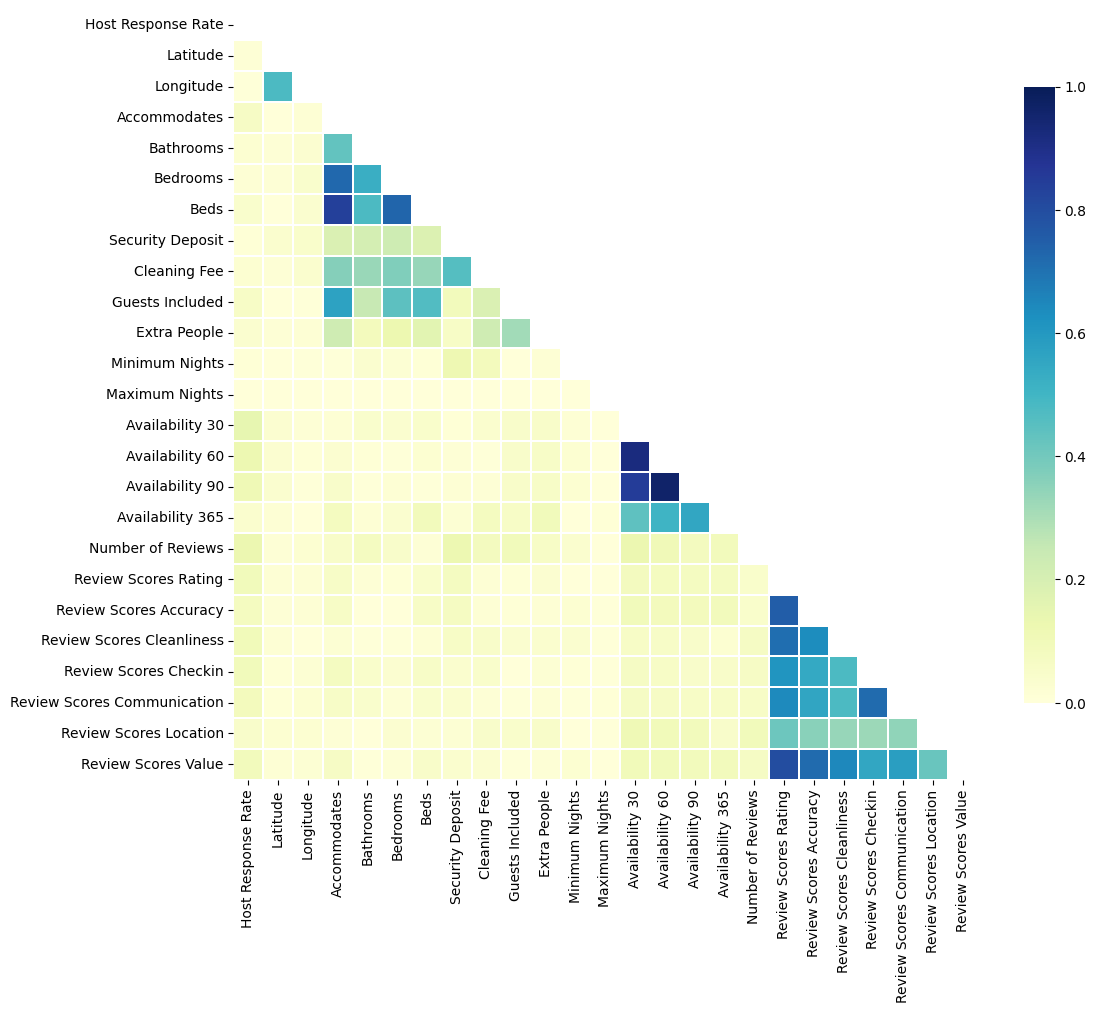

In [34]:
# Comprobar las variables redundantes
import seaborn as sns

# Compute the correlation matrix
corr = np.abs(full_df.drop(['Price'], axis=1).corr())
# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(12, 10))

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask,vmin = 0.0, vmax=1.0, center=0.5,
            linewidths=.1, cmap="YlGnBu", cbar_kws={"shrink": .8})

plt.show()

# puedo representar solo la parte inferior ya que es simétrica

In [36]:
reviews = full_df.loc[: , "Review Scores Rating":"Review Scores Value"]
full_df['Average Review'] = reviews.mean(axis=1)

full_df.drop(['Availability 30', 'Availability 60', 'Availability 90', 'Review Scores Rating', 
         'Review Scores Accuracy', 'Review Scores Cleanliness', 'Review Scores Checkin',
       'Review Scores Communication', 'Review Scores Location', 'Review Scores Value',
        'Accommodates'], axis=1, inplace=True)

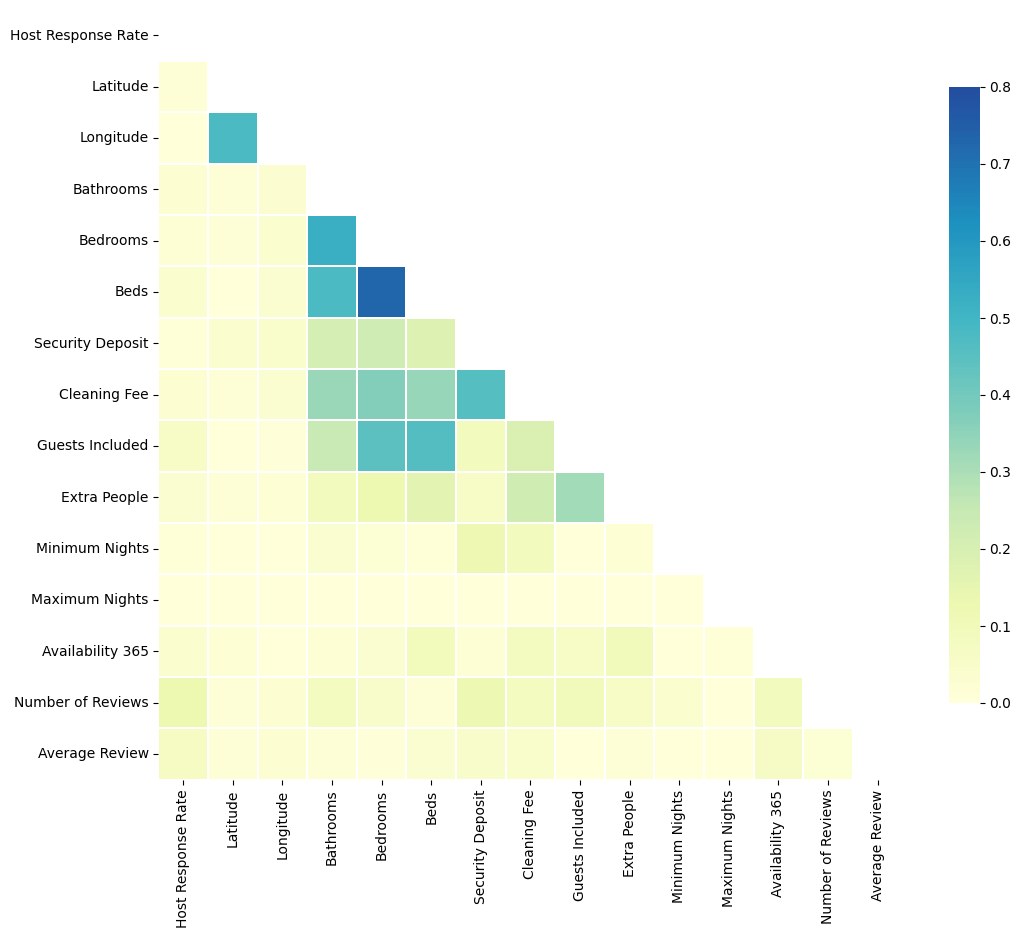

In [37]:
# Compute the correlation matrix
corr = np.abs(full_df.drop(['Price'], axis=1).corr())
# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(12, 10))

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask,vmin = 0.0, vmax=0.8, center=0.5,
            linewidths=.1, cmap="YlGnBu", cbar_kws={"shrink": .8})

plt.show()

# La matriz de correlación tiene mejor pinta

In [38]:
full_df.columns

Index(['Experiences Offered', 'Thumbnail Url', 'Host Since',
       'Host Response Time', 'Host Response Rate', 'Host Verifications',
       'Neighbourhood', 'Neighbourhood Cleansed',
       'Neighbourhood Group Cleansed', 'City', 'Country Code', 'Latitude',
       'Longitude', 'Property Type', 'Room Type', 'Bathrooms', 'Bedrooms',
       'Beds', 'Bed Type', 'Amenities', 'Price', 'Security Deposit',
       'Cleaning Fee', 'Guests Included', 'Extra People', 'Minimum Nights',
       'Maximum Nights', 'Availability 365', 'Number of Reviews',
       'Cancellation Policy', 'Features', 'Average Review'],
      dtype='object')

Por último, podemos hacer una representación (scatter_plot) de todas las variables frente al resto, para tener una idea de cómo se relacionan las variables del problema.

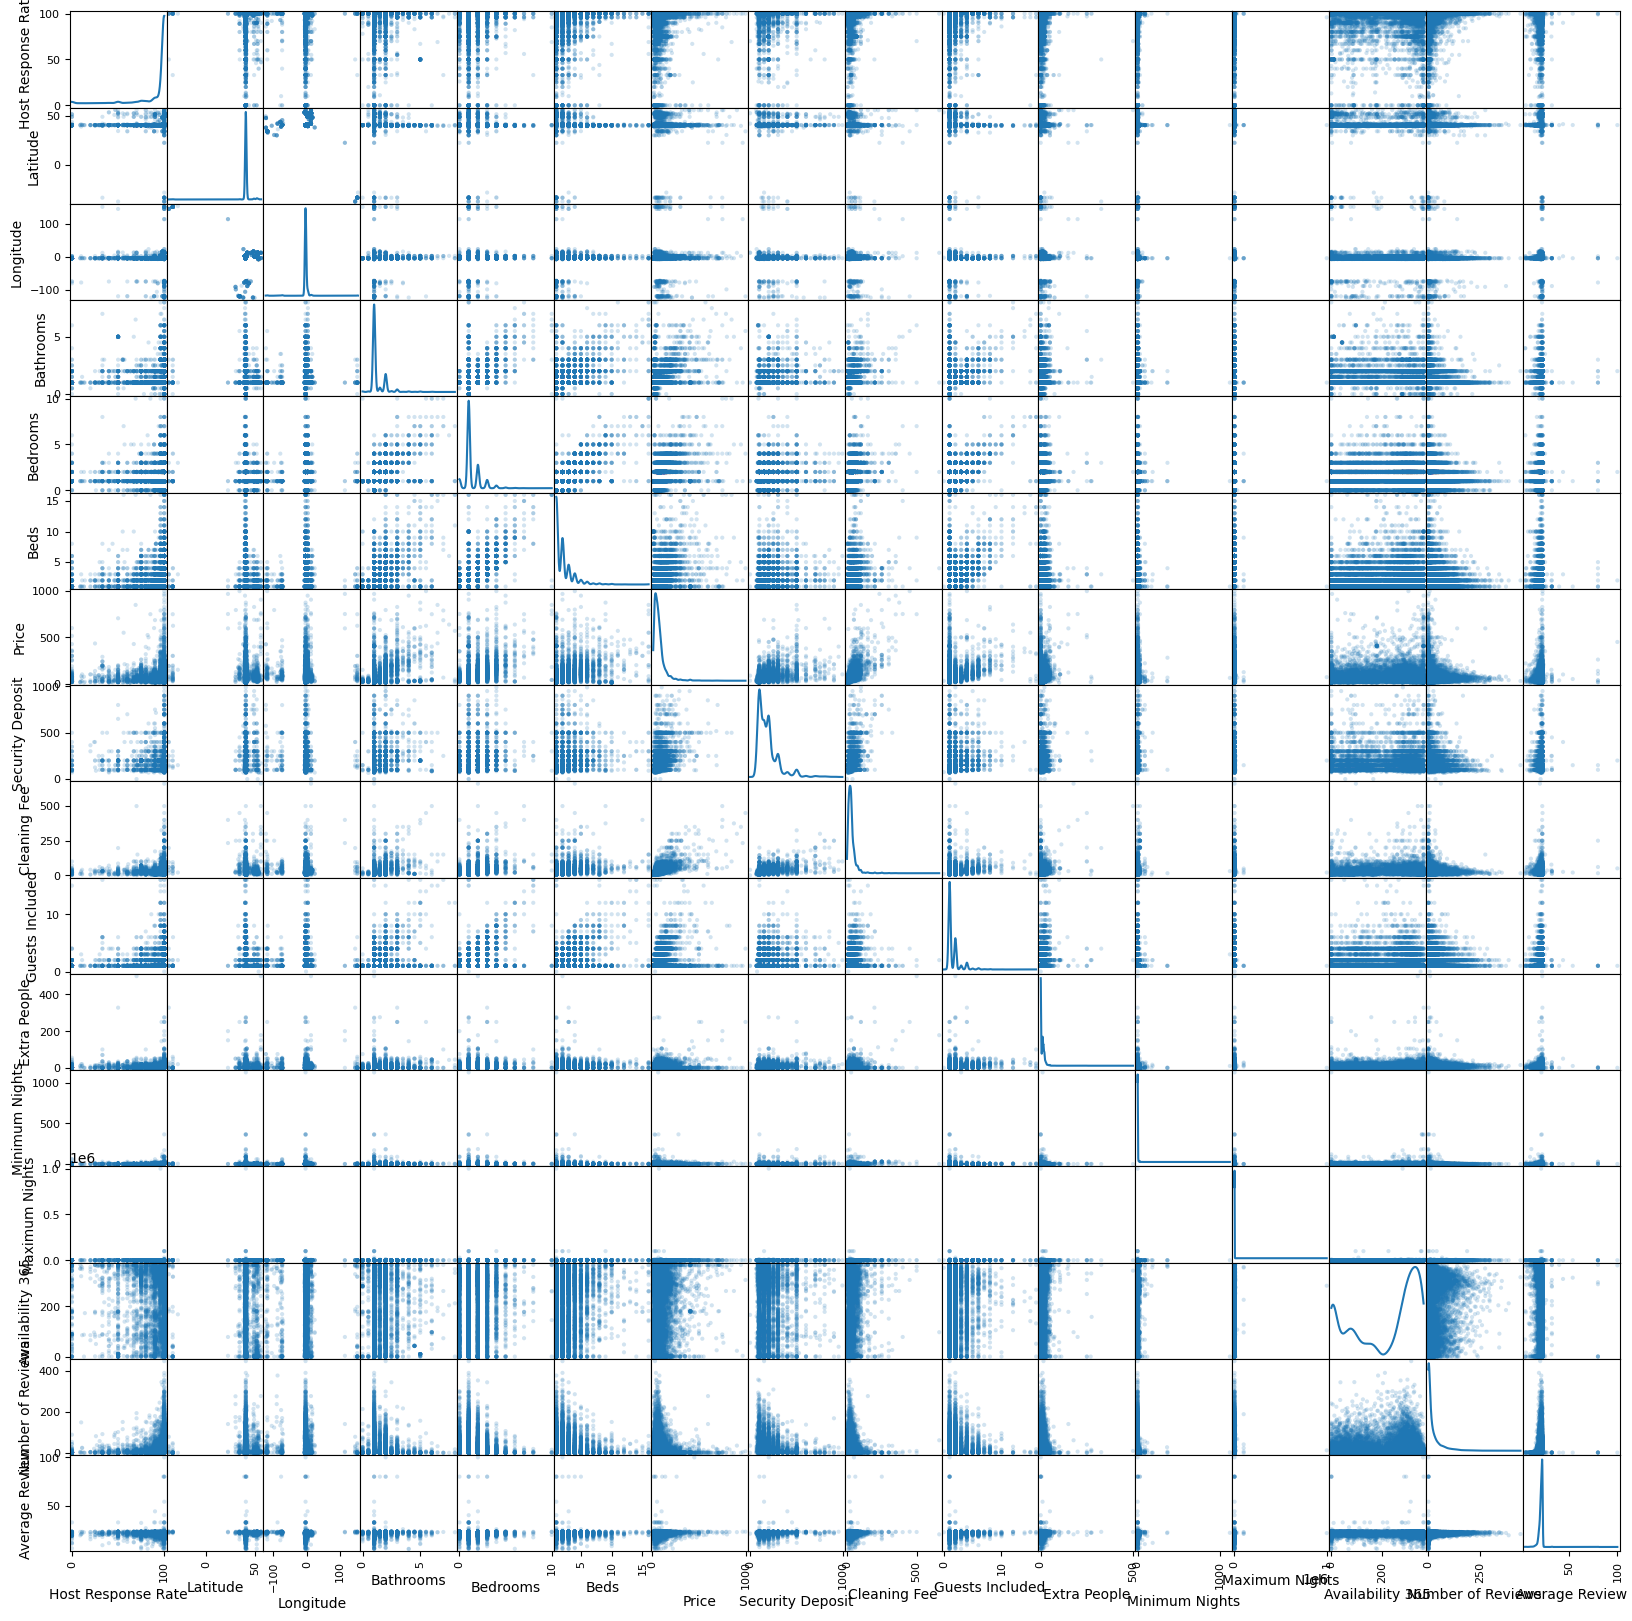

In [40]:
pd.plotting.scatter_matrix(full_df, alpha=0.2, figsize=(20, 20), diagonal = 'kde')
plt.show()

In [43]:
# Después del análisis se ha conseguido
full_df.shape

(14780, 32)

In [45]:
full_df.describe().T

,count,mean,std,min,25%,50%,75%,max
Host Response Rate,12881.0,94.823461,15.215988,0.000000,100.000000,100.000000,100.000000,100.000000
Latitude,14780.0,40.497626,4.641387,-37.851182,40.409726,40.419466,40.430916,55.966912
Longitude,14780.0,-3.858041,14.123146,-123.131344,-3.707604,-3.700785,-3.684057,153.371427
Bathrooms,14725.0,1.281732,0.658517,0.000000,1.000000,1.000000,1.000000,8.000000
Bedrooms,14755.0,1.343816,0.900078,0.000000,1.000000,1.000000,2.000000,10.000000
Beds,14731.0,2.044260,1.612770,1.000000,1.000000,2.000000,2.000000,16.000000
Price,14763.0,73.561471,72.062050,9.000000,34.000000,55.000000,86.000000,999.000000
Security Deposit,6256.0,189.226822,115.151070,0.000000,100.000000,150.000000,200.000000,990.000000
Cleaning Fee,8687.0,31.805341,30.878599,0.000000,15.000000,25.000000,40.000000,662.000000
Guests Included,14780.0,1.589986,1.182550,0.000000,1.000000,1.000000,2.000000,16.000000


In [46]:
#Creo una nueva característica para aunar los vecindarios
full_df["Final Neighbourhood"] = full_df["Neighbourhood Group Cleansed"].fillna(full_df["Neighbourhood Cleansed"])

In [47]:
full_df.drop(["Neighbourhood", "Neighbourhood Group Cleansed", "Neighbourhood Cleansed"], axis=1, inplace=True)

In [48]:
# Hay otras variables que requerirían NLP para procesar la importancia
# 'Features', 'Amenities', 'Host Verifications'
# Los cuento por si aportan algo
full_df['Features'].fillna("", inplace=True)
full_df['Amenities'].fillna("", inplace=True)
full_df['Host Verifications'].fillna("", inplace=True)

full_df['Features'] = full_df['Features'].apply(lambda x: len(str(x).split(',')))
full_df['Amenities'] = full_df['Amenities'].apply(lambda x: len(str(x).split(',')))
full_df['Host Verifications'] = full_df['Host Verifications'].apply(lambda x: len(str(x).split(',')))

In [50]:
full_df.columns

Index(['Experiences Offered', 'Thumbnail Url', 'Host Since',
       'Host Response Time', 'Host Response Rate', 'Host Verifications',
       'City', 'Country Code', 'Latitude', 'Longitude', 'Property Type',
       'Room Type', 'Bathrooms', 'Bedrooms', 'Beds', 'Bed Type', 'Amenities',
       'Price', 'Security Deposit', 'Cleaning Fee', 'Guests Included',
       'Extra People', 'Minimum Nights', 'Maximum Nights', 'Availability 365',
       'Number of Reviews', 'Cancellation Policy', 'Features',
       'Average Review', 'Final Neighbourhood'],
      dtype='object')

In [51]:
# Generación de características - Antigüedad del dueño
from datetime import datetime

full_df.dropna(subset=['Host Since'], inplace=True) # se ha visto antes que solo hay tres valores missing, no se pierde mucho

full_df['Host Since'] = full_df['Host Since'].apply(lambda x: datetime.strptime(str(x),'%Y-%m-%d'))
full_df['Years Being Host'] = full_df['Host Since'].apply(lambda x: 2017 - x.year)

full_df.drop(['Host Since'], axis=1, inplace=True)

In [53]:
# Revisión de datos
list(full_df.select_dtypes(include=['object']).columns)

['Experiences Offered',
 'Thumbnail Url',
 'Host Response Time',
 'City',
 'Country Code',
 'Property Type',
 'Room Type',
 'Bed Type',
 'Cancellation Policy',
 'Final Neighbourhood']

In [56]:
df_nn = full_df[list(full_df.select_dtypes(include=['object']).columns)]
df_nn.apply(lambda x: len(x.unique())) # valores diferentes

Experiences Offered        5
Thumbnail Url          11955
Host Response Time         5
City                     247
Country Code              18
Property Type             22
Room Type                  3
Bed Type                   5
Cancellation Policy        8
Final Neighbourhood      298
dtype: int64

In [57]:
len(df_nn) - df_nn.count() # solo thumbnail y host response time tienen missing values

Experiences Offered       0
Thumbnail Url          2820
Host Response Time     1896
City                      6
Country Code              0
Property Type             0
Room Type                 0
Bed Type                  0
Cancellation Policy       0
Final Neighbourhood       0
dtype: int64

In [58]:
df_nn["Host Response Time"].value_counts()

within an hour        7905
within a few hours    2872
within a day          1802
a few days or more     302
Name: Host Response Time, dtype: int64

Como no tenemos más datos, rellenamos con la opción más frecuente, en este caso within an hour, sobre el dataset original.

In [59]:
full_df["Host Response Time"].fillna(full_df["Host Response Time"].mode()[0], inplace=True)

In [61]:
full_df["Experiences Offered"].value_counts()

none        14760
business        8
family          3
social          3
romantic        3
Name: Experiences Offered, dtype: int64

In [63]:
# Experiences Offered tiene casi todo a none, no aporta
full_df.drop(['Experiences Offered'], axis=1, inplace=True)

In [64]:
df_nn["City"].value_counts()

Madrid                                 13204
Barcelona                                292
London                                   132
Paris                                    108
马德里                                       52
Palma                                     49
Alcúdia                                   40
Dublin                                    40
Berlin                                    40
New York                                  38
Roma                                      37
Los Angeles                               35
Brooklyn                                  27
Amsterdam                                 26
Wien                                      25
Madrid, Comunidad de Madrid, ES           20
Rome                                      18
Palma de Mallorca                         16
Toronto                                   14
Washington                                14
Inca                                      13
Selva                                     13
Búger     

In [65]:
df_nn["Country Code"].value_counts()

ES    13998
US      184
GB      159
FR      110
IT       68
AU       46
IE       45
DE       41
AT       31
NL       26
CA       20
BE       17
DK       16
CH        6
GR        5
HK        3
It        1
CU        1
Name: Country Code, dtype: int64

In [66]:
# Son muy ruidosos
full_df.drop(['City', 'Country Code'], axis=1, inplace=True)

In [67]:
# Qué columnas quedan?
full_df.columns

Index(['Thumbnail Url', 'Host Response Time', 'Host Response Rate',
       'Host Verifications', 'Latitude', 'Longitude', 'Property Type',
       'Room Type', 'Bathrooms', 'Bedrooms', 'Beds', 'Bed Type', 'Amenities',
       'Price', 'Security Deposit', 'Cleaning Fee', 'Guests Included',
       'Extra People', 'Minimum Nights', 'Maximum Nights', 'Availability 365',
       'Number of Reviews', 'Cancellation Policy', 'Features',
       'Average Review', 'Final Neighbourhood', 'Years Being Host'],
      dtype='object')

Carga de Imágenes

In [68]:
import imageio as io
import numpy as np
import cv2
n_images = 1000
images = np.zeros((n_images, 224, 224, 3), dtype=np.uint8)
urls = full_df['Thumbnail Url']

i_aux = 0
good_urls = []
for i_img, url in enumerate(urls):
    if len(good_urls) >= n_images:
        # ya tenemos n_images imágenes
        break
    try:
        img = io.imread(url)
        images[i_aux] = cv2.resize(img, (224, 224))
        good_urls.append(i_img)
        i_aux += 1
        print(f'Imagen {i_img} descargada')
        print(len(good_urls))
    except IOError as err:
        pass

Imagen 0 descargada
1
Imagen 2 descargada
2
Imagen 5 descargada
3
Imagen 6 descargada
4
Imagen 7 descargada
5
Imagen 8 descargada
6
Imagen 9 descargada
7
Imagen 10 descargada
8
Imagen 13 descargada
9
Imagen 14 descargada
10
Imagen 16 descargada
11
Imagen 17 descargada
12
Imagen 18 descargada
13
Imagen 19 descargada
14
Imagen 21 descargada
15
Imagen 22 descargada
16
Imagen 23 descargada
17
Imagen 24 descargada
18
Imagen 25 descargada
19
Imagen 26 descargada
20
Imagen 29 descargada
21
Imagen 30 descargada
22
Imagen 31 descargada
23
Imagen 35 descargada
24
Imagen 36 descargada
25
Imagen 38 descargada
26
Imagen 39 descargada
27
Imagen 40 descargada
28
Imagen 41 descargada
29
Imagen 43 descargada
30
Imagen 44 descargada
31
Imagen 45 descargada
32
Imagen 46 descargada
33
Imagen 47 descargada
34
Imagen 48 descargada
35
Imagen 50 descargada
36
Imagen 52 descargada
37
Imagen 54 descargada
38
Imagen 55 descargada
39
Imagen 56 descargada
40
Imagen 57 descargada
41
Imagen 58 descargada
42
Imagen 5

In [69]:
# Visualizamos las imágenes cargadas
print(images.shape)

(1000, 224, 224, 3)


In [70]:
# Mantenemos los datos numéricos solo para aquellos pisos que tienen imágenes 
# y las hemos obtenido
final_data = full_df.iloc[good_urls, :]
print(final_data.shape)

(1000, 27)


In [71]:
# Obtener las etiquetas de regresion
y_reg = final_data['Price']

In [72]:
# guardamos las imágenes (y yo os recomiendo que os lo guardéis en GDrive para evitar tener que repetir esto)
np.save('images.npy', images)
np.save('final_data.npy', final_data)

# Para cargar de local
# np.load('images.npy')

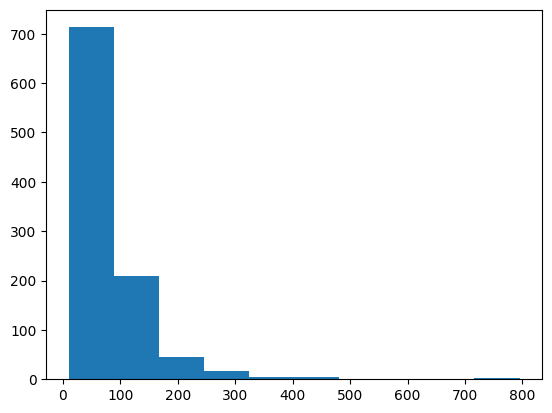

In [73]:
# y un rango para clasificación (del 1 al 3 por ejemplo: barato, normal, caro)
import matplotlib.pyplot as plt
plt.hist(y_reg, bins=10)
plt.show()

In [74]:
y_class = []
for x in y_reg:
    # barato
    if x <= 50:
        y_class.append(0)
    elif x <=150:
        y_class.append(1)
    else:
        y_class.append(2)

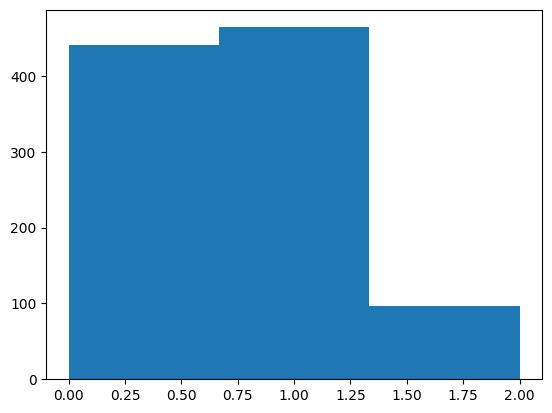

In [75]:
# veamos cómo ha quedado la distribución al convertirla a 3 clases
plt.hist(y_class, bins=3)
plt.show()

## Normalización de etiquetas de 0-1

In [76]:
max_price = full_df['Price'].max()
print(max_price)

999.0
